In [1]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 24)

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 18
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
import warnings
warnings.filterwarnings("ignore")


In [167]:
df = pd.read_csv("../data/kpi.csv")
# df=all_data[all_data["KPI ID"]=="40e25005ff8992bd"]
df['ts']=pd.to_datetime(df['timestamp'], unit='s')
df.index = df['ts']
df = df[['ts', 'value', 'label']]
df.head()

,ts,value,label
ts,,,
2017-04-01 10:08:00,2017-04-01 10:08:00,7934.0,0
2017-04-01 10:09:00,2017-04-01 10:09:00,7782.0,0
2017-04-01 10:10:00,2017-04-01 10:10:00,7349.0,0
2017-04-01 10:11:00,2017-04-01 10:11:00,7426.0,0
2017-04-01 10:12:00,2017-04-01 10:12:00,7447.0,0


In [168]:
history_data = df["value"].resample("1H").mean().fillna(method="ffill")

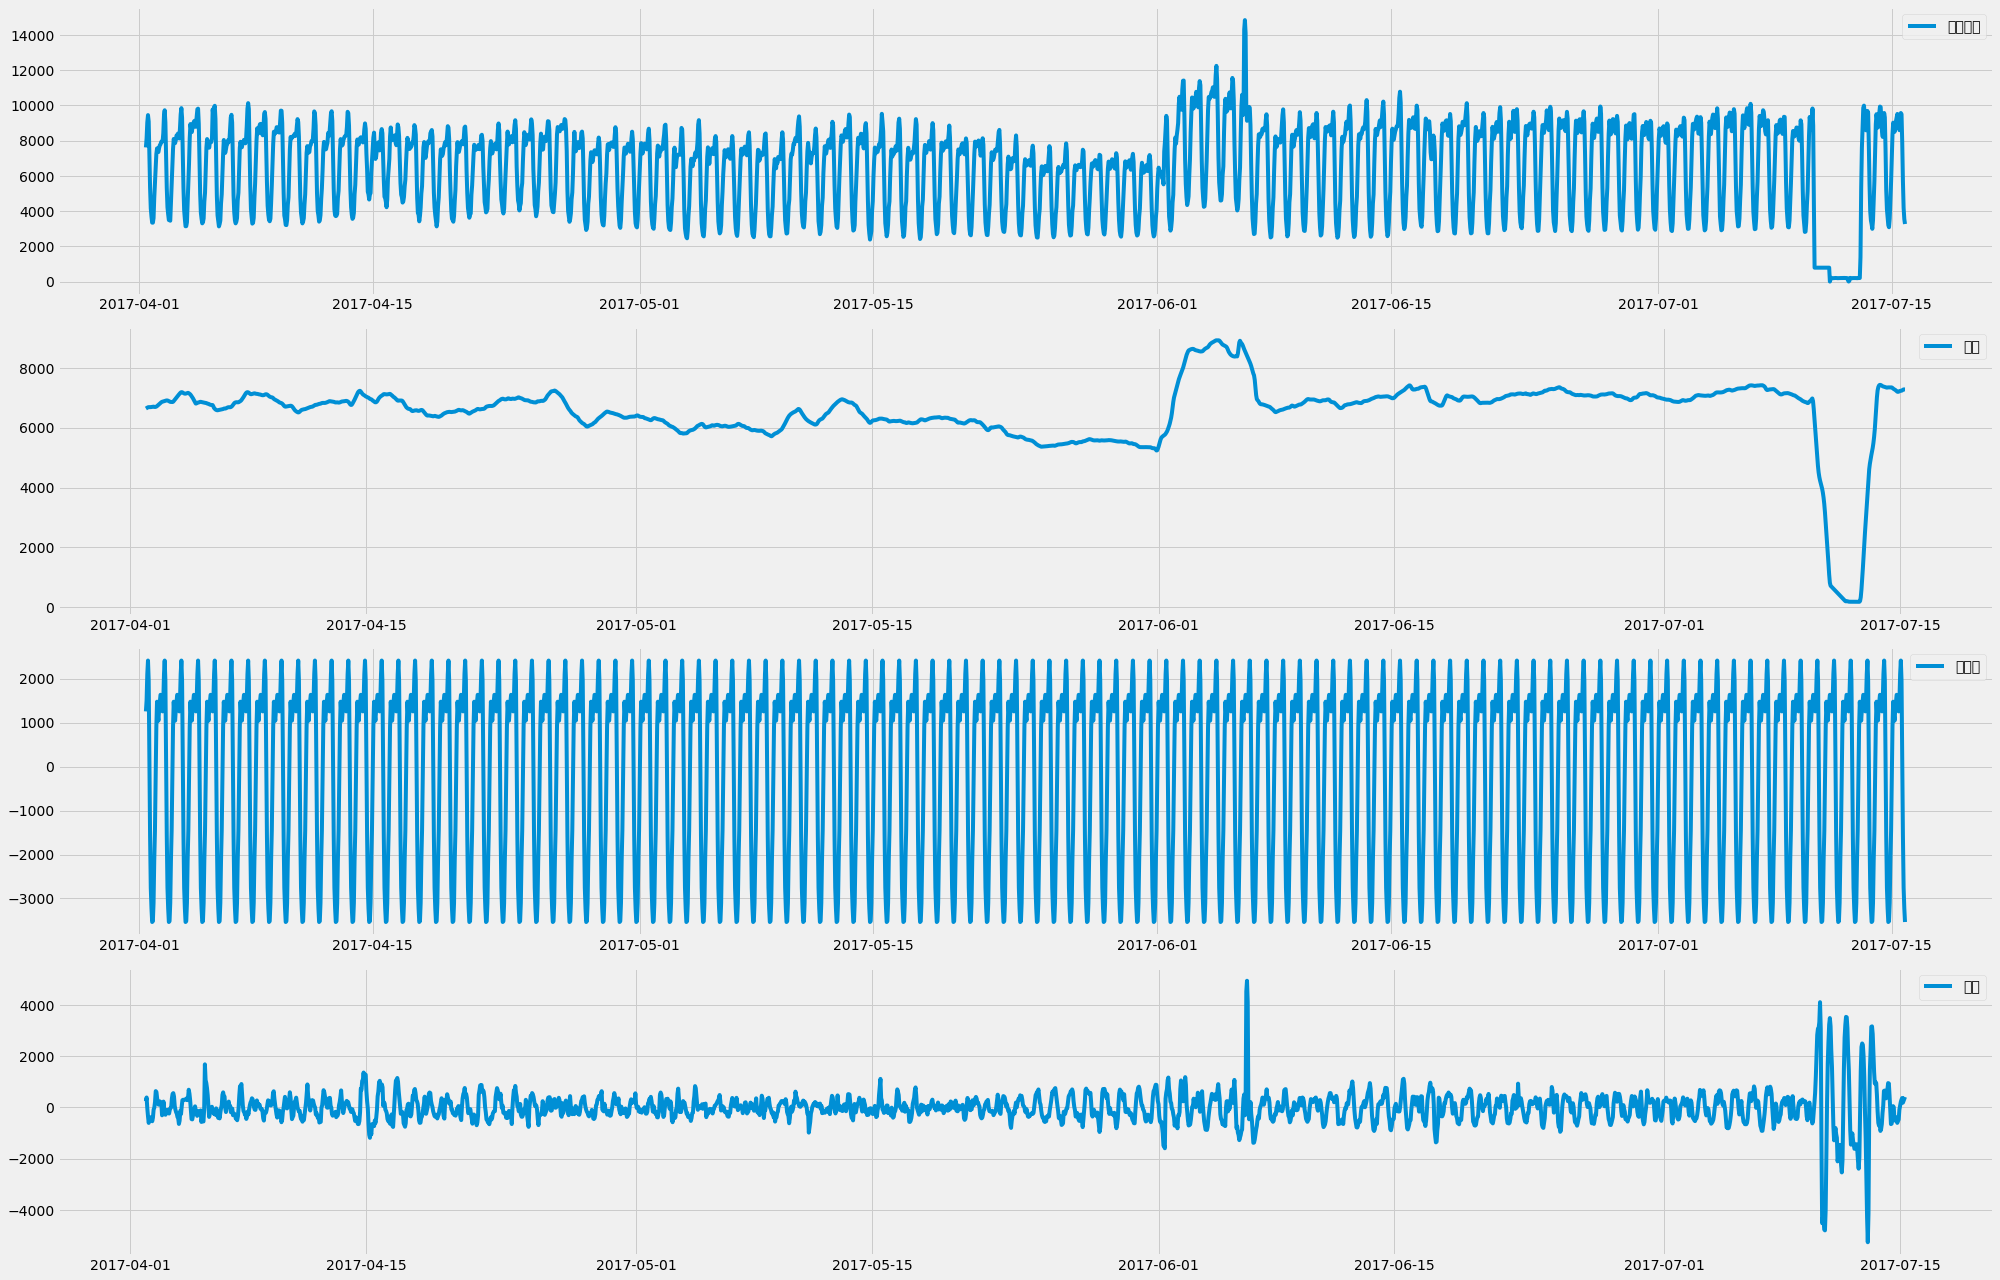

In [169]:
decomposition = seasonal_decompose(history_data)
trend = decomposition.trend #趋势效应
seasonal = decomposition.seasonal #季节效应
residual = decomposition.resid #随机效应
plt.subplot(411)
plt.plot(history_data, label=u'原始数据')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label=u'趋势')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label=u'季节性')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label=u'残差')
plt.legend(loc='best')
plt.tight_layout()

In [170]:
df["value"].resample("1H").apply(lambda l: list(l))

ts
2017-04-01 10:00:00    [7934.0, 7782.0, 7349.0, 7426.0, 7447.0, 7347....
2017-04-01 11:00:00    [7246.0, 7624.0, 9416.0, 9415.0, 9102.0, 9138....
2017-04-01 12:00:00    [8273.0, 9329.0, 10702.0, 10302.0, 10118.0, 99...
2017-04-01 13:00:00    [8679.0, 8992.0, 10607.0, 10906.0, 10688.0, 10...
2017-04-01 14:00:00    [9141.0, 9750.0, 11236.0, 11341.0, 10875.0, 10...
                                             ...                        
2017-07-15 15:00:00    [8791.0, 9587.0, 10009.0, 9852.0, 9189.0, 8877...
2017-07-15 16:00:00    [6516.0, 6937.0, 6781.0, 6455.0, 6617.0, 6658....
2017-07-15 17:00:00    [4543.0, 5033.0, 4945.0, 4841.0, 4923.0, 4973....
2017-07-15 18:00:00    [3497.0, 3756.0, 3974.0, 4049.0, 3713.0, 3760....
2017-07-15 19:00:00    [3182.0, 3401.0, 3359.0, 3653.0, 3296.0, 3392....
Length: 2530, dtype: object

In [82]:
ts = history_data
cutoff = 0.01
ts_test = adfuller(ts, autolag = 'AIC')
ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in ts_test[4].items():
    ts_test_output['Critical Value (%s)'%key] = value
print(ts_test_output)
if ts_test[1] <= cutoff:
    print(u"拒绝原假设，即数据没有单位根,序列是平稳的。")
else:
    print(u"不能拒绝原假设，即数据存在单位根,数据是非平稳序列。")

Test Statistic                   -4.619733
p-value                           0.000119
#Lags Used                       27.000000
Number of Observations Used    2502.000000
Critical Value (1%)              -3.432966
Critical Value (5%)              -2.862696
Critical Value (10%)             -2.567385
dtype: float64
拒绝原假设，即数据没有单位根,序列是平稳的。


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


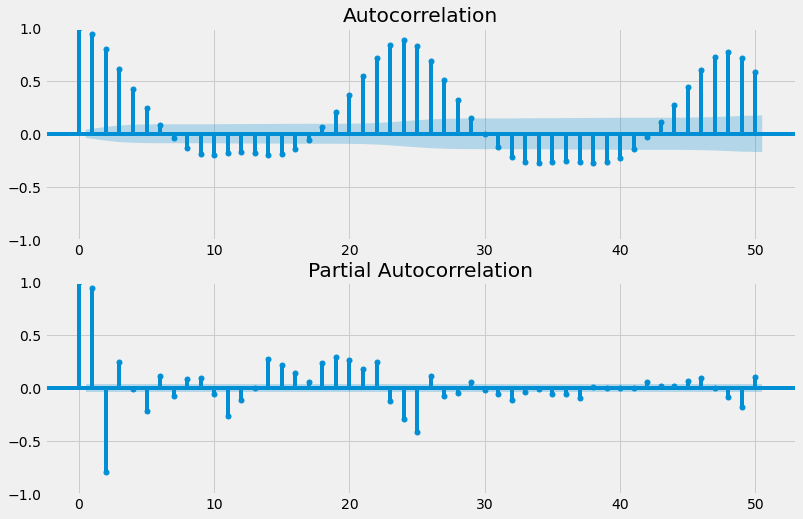

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(history_data, lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(history_data, lags=50, ax=ax2)
plt.show()

In [171]:
mod = sm.tsa.statespace.SARIMAX(history_data[:1000], order=(1, 1, 1), seasonal_order=(1,1,1,24),   
                                enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40567D+00    |proj g|=  1.10017D-01

At iterate    5    f=  6.36561D+00    |proj g|=  6.18842D-02

At iterate   10    f=  6.35981D+00    |proj g|=  2.71676D-02

At iterate   15    f=  6.35969D+00    |proj g|=  2.71623D-03

At iterate   20    f=  6.35721D+00    |proj g|=  4.68013D-02

At iterate   25    f=  6.32854D+00    |proj g|=  6.57464D-02

At iterate   30    f=  6.32500D+00    |proj g|=  4.78303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

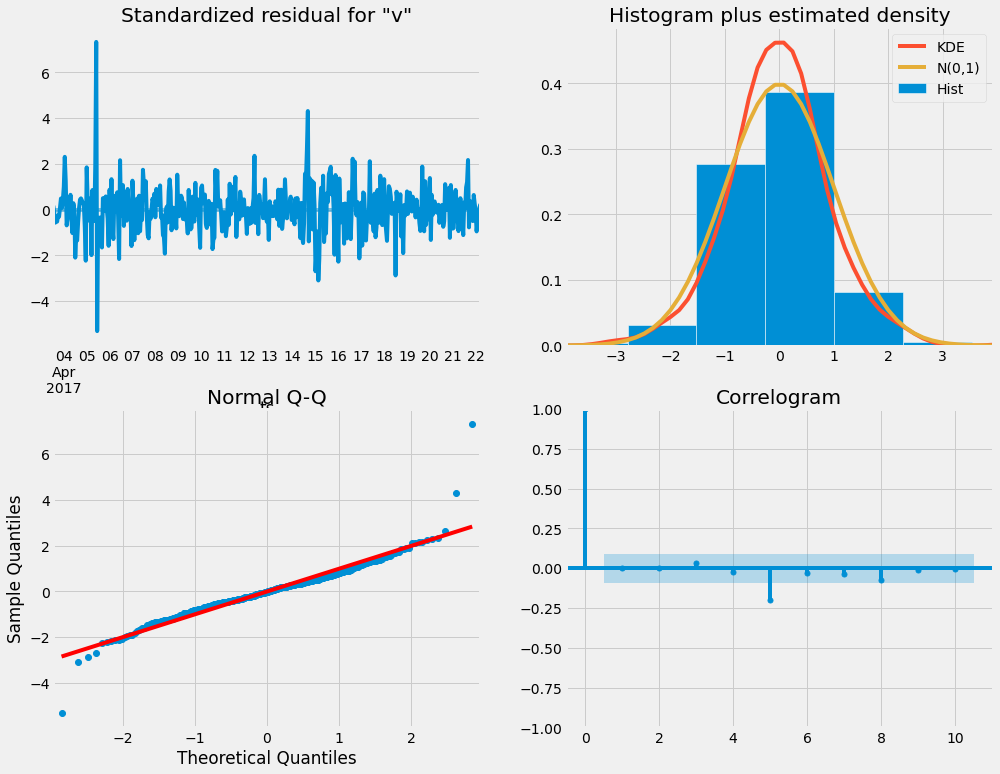

In [98]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [99]:
#LB检验
r,q,p = sm.tsa.acf(results.resid.values.squeeze(), qstat=True) 
# data = np.c_[range(1,41), r[1:], q, p] 
# table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"]) 
# print(table.set_index('lag'))
n=len(q)
data = np.c_[range(1,n+1), r[1:], q, p] 
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"]) 
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.185258   17.263353  3.254026e-05
2.0   0.097149   22.020218  1.653372e-05
3.0   0.042902   22.949772  4.136831e-05
4.0  -0.052886   24.365163  6.747961e-05
5.0  -0.221786   49.307454  1.920243e-09
6.0  -0.173573   64.615179  5.169397e-12
7.0  -0.138773   74.419866  1.880867e-13
8.0  -0.105876   80.138648  4.584577e-14
9.0  -0.092286   84.492419  2.060235e-14
10.0 -0.049408   85.742887  3.724595e-14
11.0 -0.018092   85.910891  1.050083e-13
12.0  0.015487   86.034262  2.878506e-13
13.0  0.025657   86.373543  6.870831e-13
14.0  0.054610   87.913743  9.389299e-13
15.0  0.044900   88.957083  1.551778e-12
16.0  0.038480   89.724965  2.811271e-12
17.0  0.067186   92.070741  2.560078e-12
18.0  0.080478   95.443427  1.501562e-12
19.0  0.103110  100.991305  3.541061e-13
20.0  0.036720  101.696376  6.253446e-13
21.0 -0.013674  101.794351  1.387851e-12
22.0 -0.027984  102.205572  2.649572e-12
23.0 -0.001689  

In [100]:
pred = results.get_prediction(start=400, dynamic=False)
pred_ci = pred.conf_int()

In [101]:
pred_ci = pred.conf_int()
y_true = history_data.iloc[400:500].values
y_pred = pred.predicted_mean.values


In [102]:
# 计算MSE，RMSE
mse = ((y_pred - y_true) ** 2).mean()
print(u'预测值的均方误差(MSE)是{}'.format(round(mse, 2)))
print('预测值的均方根误差(RMSE)是: {:.4f}'.format(np.sqrt(sum((y_pred-y_true)**2)/len(y_pred))))

预测值的均方误差(MSE)是24357.27
预测值的均方根误差(RMSE)是: 156.0681


In [95]:
mte = history_data[:1000]
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q)) 
pdq_x_PDQs = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))] 
a=[]
b=[]
c=[]
wf=pd.DataFrame()
for param in pdq:
    for seasonal_param in pdq_x_PDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,order=param,seasonal_order=seasonal_param,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            a.append(param)
            b.append(seasonal_param)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_PDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02411D+01    |proj g|=  3.44613D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.446D-08   1.024D+01
  F =   10.241147624041551     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 24) - AIC:20484.2952480831
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables a

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.08072D+00    |proj g|=  1.82784D-04

At iterate   10    f=  7.08069D+00    |proj g|=  4.30118D-03

At iterate   15    f=  7.08012D+00    |proj g|=  4.88328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     19      1     0     0   3.847D-06   7.080D+00
  F =   7.0800916460993086     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 24) - AIC:14164.183292198617
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.28119D+00    |proj g|=  7.66460D-01

At iterate   10    f=  7.27912D+00    |proj g|=  1.52223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   3.317D-04   7.279D+00
  F =   7.2791212559662526     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 24) - AIC:14564.242511932505
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10805D+00    |proj g|=  4.89440D-06

           * * 

 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 24) - AIC:14220.093747688203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10305D+00    |proj g|=  1.05702D-01


 This problem is unconstrained.



At iterate    5    f=  7.05338D+00    |proj g|=  5.30999D-02

At iterate   10    f=  7.05258D+00    |proj g|=  1.32497D-04

At iterate   15    f=  7.05256D+00    |proj g|=  7.31277D-03

At iterate   20    f=  7.05196D+00    |proj g|=  1.26889D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     32      1     0     0   1.538D-06   7.052D+00
  F =   7.0517858603996038     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 24) - AIC:14109.571720799207
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  9.53229D+00    |proj g|=  1.02684D-03

At iterate   10    f=  9.53228D+00    |proj g|=  1.14780D-03

At iterate   15    f=  9.53201D+00    |proj g|=  1.56161D-02

At iterate   20    f=  9.51704D+00    |proj g|=  9.23979D-02

At iterate   25    f=  9.00577D+00    |proj g|=  1.07875D+00

At iterate   30    f=  8.79875D+00    |proj g|=  5.26005D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     55      1     0     0   5.797D-06   8.798D+00
  F =   8.7984849970181127     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 24) - AIC:17602.9699940362

 This problem is unconstrained.



At iterate   10    f=  6.98970D+00    |proj g|=  2.66963D-02

At iterate   15    f=  6.96276D+00    |proj g|=  3.67291D-01

At iterate   20    f=  6.94067D+00    |proj g|=  3.26287D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     21     24      1     0     0   1.009D-07   6.941D+00
  F =   6.9406715413907900     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 24) - AIC:13885.34308278158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate    5    f=  6.78078D+00    |proj g|=  1.81146D-02

At iterate   10    f=  6.78025D+00    |proj g|=  3.63526D-03

At iterate   15    f=  6.77905D+00    |proj g|=  6.17587D-02

At iterate   20    f=  6.72414D+00    |proj g|=  3.23385D-01

At iterate   25    f=  6.69730D+00    |proj g|=  5.58161D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     30      1     0     0   1.449D-06   6.697D+00
  F =   6.6972945561984050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 24) - AIC:13400.58911239681
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate   20    f=  9.10285D+00    |proj g|=  4.68894D+00

At iterate   25    f=  7.50000D+00    |proj g|=  8.62244D+00

At iterate   30    f=  6.96251D+00    |proj g|=  5.68774D-02

At iterate   35    f=  6.95404D+00    |proj g|=  6.37331D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     62      1     0     0   6.373D-04   6.954D+00
  F =   6.9540397063420620     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 0, 24) - AIC:13914.079412684125
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  9.48847D+00    |proj g|=  4.03961D-03

At iterate   10    f=  9.48785D+00    |proj g|=  1.43449D-04

At iterate   15    f=  9.48782D+00    |proj g|=  3.65821D-03

At iterate   20    f=  9.48559D+00    |proj g|=  2.79193D-02

At iterate   25    f=  9.44096D+00    |proj g|=  1.26115D-01

At iterate   30    f=  8.75658D+00    |proj g|=  2.76884D+01

At iterate   35    f=  7.33820D+00    |proj g|=  2.79322D+00

At iterate   40    f=  7.20973D+00    |proj g|=  4.22359D+00

At iterate   45    f=  6.92610D+00    |proj g|=  3.38655D-01

At iterate   50    f=  6.89565D+00    |proj g|=  6.94758D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.80940D+00    |proj g|=  6.71201D-03

At iterate   10    f=  6.80934D+00    |proj g|=  2.63864D-03

At iterate   15    f=  6.80797D+00    |proj g|=  4.76900D-02

At iterate   20    f=  6.75447D+00    |proj g|=  1.31413D-01

At iterate   25    f=  6.74499D+00    |proj g|=  2.67184D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     28      1     0     0   9.111D-07   6.745D+00
  F =   6.7449917707790759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 24) - AIC:13495.983541558151
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  6.79102D+00    |proj g|=  1.62822D-02

At iterate   10    f=  6.77349D+00    |proj g|=  1.86997D-01

At iterate   15    f=  6.76635D+00    |proj g|=  1.24661D-03

At iterate   20    f=  6.76508D+00    |proj g|=  4.28090D-02

At iterate   25    f=  6.73227D+00    |proj g|=  1.51481D-01

At iterate   30    f=  6.70840D+00    |proj g|=  8.88347D-02

At iterate   35    f=  6.67408D+00    |proj g|=  8.57515D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     49      1     0     0   4.536D-06   6.674D+00
  F =   6.6740463239650554     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.53600D+00    |proj g|=  1.95857D-02

At iterate   15    f=  7.51491D+00    |proj g|=  3.67776D-01

At iterate   20    f=  7.39820D+00    |proj g|=  1.37322D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     26      1     0     0   4.186D-06   7.398D+00
  F =   7.3981463329668680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 24) - AIC:14800.292665933735
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39260D+00    |proj g|=  1.66035D-01

At iterate    5    f=  6.36516D+00    |proj g|=  3.44051D-03

At iterate   10    f=  6.36486D+00    |proj g|=  2.85081D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     17      1     0     0   2.162D-06   6.365D+00
  F =   6.3648620400638558     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 24) - AIC:12733.724080127711
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  6.52788D+00    |proj g|=  6.23491D-01

At iterate   10    f=  6.52675D+00    |proj g|=  7.19160D-03

At iterate   15    f=  6.52576D+00    |proj g|=  2.53762D-01

At iterate   20    f=  6.52219D+00    |proj g|=  7.17978D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     69      2     0     0   1.040D-05   6.522D+00
  F =   6.5221578951767336     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 1, 24) - AIC:13050.315790353467
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.45323D+00    |proj g|=  5.41069D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 1, 0, 24) - AIC:12910.451697991191
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40018D+00    |proj g|=  1.47541D-01


 This problem is unconstrained.



At iterate    5    f=  6.35683D+00    |proj g|=  1.00550D-02

At iterate   10    f=  6.35676D+00    |proj g|=  7.43291D-03

At iterate   15    f=  6.35591D+00    |proj g|=  5.43145D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   3.112D-06   6.356D+00
  F =   6.3558951434457542     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 24) - AIC:12717.790286891508
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.33891D+00    |proj g|=  5.60115D-02

At iterate   10    f=  7.33782D+00    |proj g|=  3.29157D-03

At iterate   15    f=  7.33618D+00    |proj g|=  5.63264D-02

At iterate   20    f=  7.25372D+00    |proj g|=  3.26882D-01

At iterate   25    f=  7.21948D+00    |proj g|=  1.13412D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     30      1     0     0   6.043D-07   7.219D+00
  F =   7.2194756490210708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 24) - AIC:14444.951298042142
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40084D+00    |proj g|=  1.21431D-01

At iterate    5    f=  6.37908D+00    |proj g|=  1.18156D-03

At iterate   10    f=  6.37772D+00    |proj g|=  4.72373D-02

At iterate   15    f=  6.35592D+00    |proj g|=  5.98915D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   1.676D-06   6.355D+00
  F =   6.3546406487709497     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 24) - AIC:12715.2812975419
R

 This problem is unconstrained.



At iterate   15    f=  7.19711D+00    |proj g|=  6.62022D-02

At iterate   20    f=  7.09973D+00    |proj g|=  5.44246D-01

At iterate   25    f=  6.68031D+00    |proj g|=  6.18111D-02

At iterate   30    f=  6.67584D+00    |proj g|=  4.05231D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     36      1     0     0   1.712D-06   6.676D+00
  F =   6.6758365570132465     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 0, 24) - AIC:13357.673114026493
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  7.17214D+00    |proj g|=  1.40409D-02

At iterate   10    f=  7.17152D+00    |proj g|=  1.47748D-03

At iterate   15    f=  7.17145D+00    |proj g|=  1.13304D-02

At iterate   20    f=  7.16654D+00    |proj g|=  3.70729D-02

At iterate   25    f=  6.86050D+00    |proj g|=  2.95957D+00

At iterate   30    f=  6.51496D+00    |proj g|=  8.05912D-01

At iterate   35    f=  6.51209D+00    |proj g|=  1.57355D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     53      1     0     0   6.863D-07   6.512D+00
  F =   6.5120910824605964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  6.45728D+00    |proj g|=  1.61716D-03

At iterate   10    f=  6.45674D+00    |proj g|=  2.94028D-02

At iterate   15    f=  6.45218D+00    |proj g|=  9.77916D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   9.366D-06   6.452D+00
  F =   6.4521779454870982     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 24) - AIC:12910.355890974197
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  6.37473D+00    |proj g|=  1.58907D-02

At iterate   10    f=  6.37444D+00    |proj g|=  2.43000D-03

At iterate   15    f=  6.37219D+00    |proj g|=  4.16899D-02

At iterate   20    f=  6.34777D+00    |proj g|=  2.59414D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   8.333D-06   6.347D+00
  F =   6.3467731774321381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 24) - AIC:12701.546354864277
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.54983D+00    |proj g|=  7.68117D-04

At iterate   10    f=  7.54976D+00    |proj g|=  1.33463D-02

At iterate   15    f=  7.54200D+00    |proj g|=  2.74805D-01

At iterate   20    f=  7.40671D+00    |proj g|=  1.61827D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   9.095D-05   7.404D+00
  F =   7.4039736285741045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 1, 24) - AIC:14813.94725714821
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0  

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(0, 1, 0, 24) - AIC:13309.37798847353
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40564D+00    |proj g|=  1.57091D-01

At iterate    5    f=  6.36639D+00    |proj g|=  1.14590D-03

At iterate   10    f=  6.36615D+00    |proj g|=  1.96420D-02

At iterate   15    f=  6.34838D+00    |proj g|=  1.08152D-01

At iterate   20    f=  6.34545D+00    |proj g|=  5.80691D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   5.807D-06

 This problem is unconstrained.



At iterate   20    f=  6.64994D+00    |proj g|=  2.20332D-01

At iterate   25    f=  6.64835D+00    |proj g|=  2.50582D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     37      1     0     0   2.506D-06   6.648D+00
  F =   6.6483537763919704     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 24) - AIC:13302.70755278394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.38322D+00    |proj g|=  3.82833D-02


 This problem is unconstrained.



At iterate    5    f=  7.38122D+00    |proj g|=  1.21537D-03

At iterate   10    f=  7.38113D+00    |proj g|=  1.32640D-02

At iterate   15    f=  7.37472D+00    |proj g|=  5.68861D-02

At iterate   20    f=  6.96457D+00    |proj g|=  2.94185D+01

At iterate   25    f=  6.52167D+00    |proj g|=  1.76570D-01

At iterate   30    f=  6.50168D+00    |proj g|=  3.99324D-02

At iterate   35    f=  6.50110D+00    |proj g|=  5.67670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     51      1     0     0   2.166D-05   6.501D+00
  F =   6.5011042274083009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.42716D+00    |proj g|=  2.49771D-03

At iterate   10    f=  6.42565D+00    |proj g|=  3.98990D-02

At iterate   15    f=  6.42278D+00    |proj g|=  5.56883D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   2.283D-06   6.423D+00
  F =   6.4227803989915158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 24) - AIC:12851.560797983031
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  6.38878D+00    |proj g|=  2.01614D-01

At iterate   10    f=  6.36253D+00    |proj g|=  1.77843D-03

At iterate   15    f=  6.36225D+00    |proj g|=  2.21212D-02

At iterate   20    f=  6.34311D+00    |proj g|=  1.30151D-01

At iterate   25    f=  6.33996D+00    |proj g|=  9.14696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     34      1     0     0   1.227D-05   6.340D+00
  F =   6.3399587844412197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 1, 24) - AIC:12687.91756888244
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.51137D+00    |proj g|=  4.58697D-01

At iterate   10    f=  7.50021D+00    |proj g|=  3.33676D-03

At iterate   15    f=  7.50020D+00    |proj g|=  1.05516D-02

At iterate   20    f=  7.49911D+00    |proj g|=  1.36587D-01

At iterate   25    f=  7.40149D+00    |proj g|=  1.58888D+00

At iterate   30    f=  7.23351D+00    |proj g|=  1.38506D-01

At iterate   35    f=  7.22565D+00    |proj g|=  5.22115D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     54      1     0     0   3.197D-05   7.226D+00
  F =   7.2255070455069657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(0, 1, 0, 24) - AIC:13292.939023694118
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39456D+00    |proj g|=  1.61116D-01

At iterate    5    f=  6.35283D+00    |proj g|=  8.52652D-03

At iterate   10    f=  6.35276D+00    |proj g|=  4.85221D-03

At iterate   15    f=  6.34962D+00    |proj g|=  5.22096D-02

At iterate   20    f=  6.33000D+00    |proj g|=  1.62785D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   2.112D-0

 This problem is unconstrained.



At iterate    5    f=  7.38430D+00    |proj g|=  1.91394D-01

At iterate   10    f=  7.34326D+00    |proj g|=  5.09630D-01

At iterate   15    f=  7.14098D+00    |proj g|=  6.52141D-02

At iterate   20    f=  7.13200D+00    |proj g|=  4.47895D-02

At iterate   25    f=  7.13119D+00    |proj g|=  2.95930D-03

At iterate   30    f=  7.12651D+00    |proj g|=  6.04764D-02

At iterate   35    f=  6.99507D+00    |proj g|=  1.73753D+00

At iterate   40    f=  6.66974D+00    |proj g|=  5.92412D-01

At iterate   45    f=  6.64580D+00    |proj g|=  1.77648D-02

At iterate   50    f=  6.64571D+00    |proj g|=  9.80069D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.11243D+00    |proj g|=  1.67336D-02

At iterate   10    f=  7.11080D+00    |proj g|=  3.36825D-02

At iterate   15    f=  7.11063D+00    |proj g|=  1.69910D-02

At iterate   20    f=  7.07126D+00    |proj g|=  7.15890D-01

At iterate   25    f=  6.52495D+00    |proj g|=  3.69544D-01

At iterate   30    f=  6.48572D+00    |proj g|=  2.30802D-01

At iterate   35    f=  6.48550D+00    |proj g|=  6.04014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     56      1     0     0   1.474D-05   6.485D+00
  F =   6.4854968536096189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  6.42236D+00    |proj g|=  1.61334D-03

At iterate   10    f=  6.41973D+00    |proj g|=  4.99915D-02

At iterate   15    f=  6.41745D+00    |proj g|=  5.44442D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   2.917D-06   6.417D+00
  F =   6.4174526012359134     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 24) - AIC:12842.905202471828
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  6.36268D+00    |proj g|=  1.76477D-01

At iterate   10    f=  6.34978D+00    |proj g|=  7.67942D-03

At iterate   15    f=  6.34969D+00    |proj g|=  4.46080D-03

At iterate   20    f=  6.34385D+00    |proj g|=  6.19033D-02

At iterate   25    f=  6.32540D+00    |proj g|=  1.19081D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   4.209D-06   6.325D+00
  F =   6.3253607605874098     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 24) - AIC:12660.721521174819
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24880D+00    |proj g|=  1.67106D-01

At iterate    5    f=  7.23260D+00    |proj g|=  8.42650D-04

At iterate   10    f=  7.23211D+00    |proj g|=  2.20406D-02

At iterate   15    f=  7.19486D+00    |proj g|=  1.90522D-01

At iterate   20    f=  7.16608D+00    |proj g|=  3.55379D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   3.821D-05   7.166D+00
  F =   7.1660750572453127     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 0, 1, 24) - AIC:14338.150114490625
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68115D+00    |proj g|=  4.86713D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.867D-06   6.681D+00
  F =   6.6811515150155341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 0, 24) - AIC:13366.303030031067
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       

 This problem is unconstrained.



At iterate   20    f=  6.70441D+00    |proj g|=  6.28320D-01

At iterate   25    f=  6.66952D+00    |proj g|=  6.50853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     34      1     0     0   8.813D-06   6.670D+00
  F =   6.6695164941611260     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 0, 24) - AIC:13345.032988322251
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds



 This problem is unconstrained.


At iterate    0    f=  7.06961D+00    |proj g|=  1.03306D-01

At iterate    5    f=  7.03563D+00    |proj g|=  2.40273D-02

At iterate   10    f=  7.03432D+00    |proj g|=  1.63791D-03

At iterate   15    f=  7.02976D+00    |proj g|=  2.94599D-02

At iterate   20    f=  6.88608D+00    |proj g|=  5.09093D-01

At iterate   25    f=  6.64556D+00    |proj g|=  2.41074D+00

At iterate   30    f=  6.51876D+00    |proj g|=  1.11266D-01

At iterate   35    f=  6.51867D+00    |proj g|=  2.76044D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     57      1     0     0   1.999D-06   6.519D+00
  F =   6.518672757061

 This problem is unconstrained.



At iterate    5    f=  6.45085D+00    |proj g|=  2.04893D-03

At iterate   10    f=  6.45015D+00    |proj g|=  3.32585D-02

At iterate   15    f=  6.44585D+00    |proj g|=  5.47626D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     19      1     0     0   8.773D-07   6.446D+00
  F =   6.4458454331383015     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 24) - AIC:12897.690866276604


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.41291D+00    |proj g|=  1.08431D-01

At iterate    5    f=  6.38132D+00    |proj g|=  1.57977D-02

At iterate   10    f=  6.38104D+00    |proj g|=  2.38693D-03

At iterate   15    f=  6.37888D+00    |proj g|=  4.09073D-02

At iterate   20    f=  6.35466D+00    |proj g|=  2.90591D-02

At iterate   25    f=  6.35350D+00    |proj g|=  8.93907D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.20413D+00    |proj g|=  8.17077D-04

At iterate   10    f=  7.20389D+00    |proj g|=  1.58858D-02

At iterate   15    f=  7.17937D+00    |proj g|=  1.82251D-01

At iterate   20    f=  7.14742D+00    |proj g|=  5.26061D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     28      1     0     0   1.700D-06   7.147D+00
  F =   7.1474039419085180     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 24) - AIC:14302.807883817037
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  6.65327D+00    |proj g|=  2.31537D-01

At iterate   10    f=  6.64363D+00    |proj g|=  4.75776D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     27      1     0     0   2.768D-04   6.644D+00
  F =   6.6436190618276445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 24) - AIC:13293.238123655288
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39965D+00    |proj g|=  1.24187D-01


 This problem is unconstrained.



At iterate    5    f=  6.36542D+00    |proj g|=  5.44245D-02

At iterate   10    f=  6.36521D+00    |proj g|=  1.29555D-03

At iterate   15    f=  6.36495D+00    |proj g|=  2.18422D-02

At iterate   20    f=  6.34490D+00    |proj g|=  1.73772D-01

At iterate   25    f=  6.33585D+00    |proj g|=  3.27108D-02

At iterate   30    f=  6.33495D+00    |proj g|=  8.62618D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     51      1     0     0   1.850D-05   6.335D+00
  F =   6.3349368802654622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 1, 24) - AIC:12677.8737605309

 This problem is unconstrained.



At iterate   15    f=  7.02418D+00    |proj g|=  4.31161D-02

At iterate   20    f=  7.02351D+00    |proj g|=  8.68415D-03

At iterate   25    f=  7.00697D+00    |proj g|=  1.40303D-01

At iterate   30    f=  6.67006D+00    |proj g|=  5.73214D-02

At iterate   35    f=  6.66945D+00    |proj g|=  1.23881D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     53      1     0     0   8.618D-06   6.669D+00
  F =   6.6694496042643046     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 24) - AIC:13346.89920852861
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  6.99867D+00    |proj g|=  2.99655D-02

At iterate   10    f=  6.99846D+00    |proj g|=  2.49676D-03

At iterate   15    f=  6.99800D+00    |proj g|=  1.05661D-01

At iterate   20    f=  6.99346D+00    |proj g|=  1.62833D-01

At iterate   25    f=  6.99167D+00    |proj g|=  1.48837D-02

At iterate   30    f=  6.99135D+00    |proj g|=  3.67181D-02

At iterate   35    f=  6.97807D+00    |proj g|=  2.94617D-01

At iterate   40    f=  6.69062D+00    |proj g|=  1.62545D+00

At iterate   45    f=  6.50406D+00    |proj g|=  1.12261D-01

At iterate   50    f=  6.49209D+00    |proj g|=  6.77576D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.42883D+00    |proj g|=  3.01036D-02

At iterate   10    f=  6.42817D+00    |proj g|=  6.10318D-02

At iterate   15    f=  6.42421D+00    |proj g|=  1.35836D-01

At iterate   20    f=  6.41892D+00    |proj g|=  1.96774D-02

At iterate   25    f=  6.41878D+00    |proj g|=  1.22174D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     45      1     0     0   1.026D-05   6.419D+00
  F =   6.4187755283245149     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 24) - AIC:12845.55105664903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  6.36561D+00    |proj g|=  6.18842D-02

At iterate   10    f=  6.35981D+00    |proj g|=  2.71676D-02

At iterate   15    f=  6.35969D+00    |proj g|=  2.71623D-03

At iterate   20    f=  6.35721D+00    |proj g|=  4.68013D-02

At iterate   25    f=  6.32854D+00    |proj g|=  6.57464D-02

At iterate   30    f=  6.32500D+00    |proj g|=  4.78303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   5.532D-06   6.325D+00
  F =   6.3249955155206274     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 1, 24) - AIC:12659.9910310412

In [96]:
print(wf[wf['aic']==wf['aic'].min()])

12659.991031041254

In [134]:
mte=history_data[:1000]
pred = results.get_prediction(start = 400, dynamic=True)
pred_ci = pred.conf_int()
mte_forecast = pred.predicted_mean
print(pred.predicted_mean)
mte_truth = mte.loc['2017-04-18 02:00:00':'2017-04-22 05:00:00']
mte_pred_concat = pd.concat([mte_truth, mte_forecast,pred_ci],axis=1)
mte_pred_concat.columns = [u'原始值',u'预测值',u'下限',u'上限']
mte_pred_concat.tail(15)

ts
2017-04-18 02:00:00    8110.380877
2017-04-18 03:00:00    7738.621268
2017-04-18 04:00:00    7553.726575
2017-04-18 05:00:00    7617.135963
2017-04-18 06:00:00    7771.950196
                          ...     
2017-04-22 01:00:00    7518.542843
2017-04-22 02:00:00    8024.434764
2017-04-22 03:00:00    7645.845959
2017-04-22 04:00:00    7462.806822
2017-04-22 05:00:00    7532.936879
Freq: H, Name: predicted_mean, Length: 100, dtype: float64


,原始值,预测值,下限,上限
ts,,,,
2017-04-21 15:00:00,6538.661017,6722.942751,1260.897749,12184.987753
2017-04-21 16:00:00,5553.793103,5139.139061,-372.682898,10650.961019
2017-04-21 17:00:00,4518.661017,4158.997585,-1402.155805,9720.150974
2017-04-21 18:00:00,4255.433333,3943.307066,-1666.743980,9553.358112
2017-04-21 19:00:00,3931.283333,3656.896925,-2001.629248,9315.423098
2017-04-21 20:00:00,3983.233333,3739.727705,-1966.861834,9446.317245
2017-04-21 21:00:00,4130.100000,4028.598918,-1725.652543,9782.850380
2017-04-21 22:00:00,5176.898305,4945.210819,-856.311017,10746.732654
2017-04-21 23:00:00,5797.333333,5480.040681,-368.369471,11328.450833


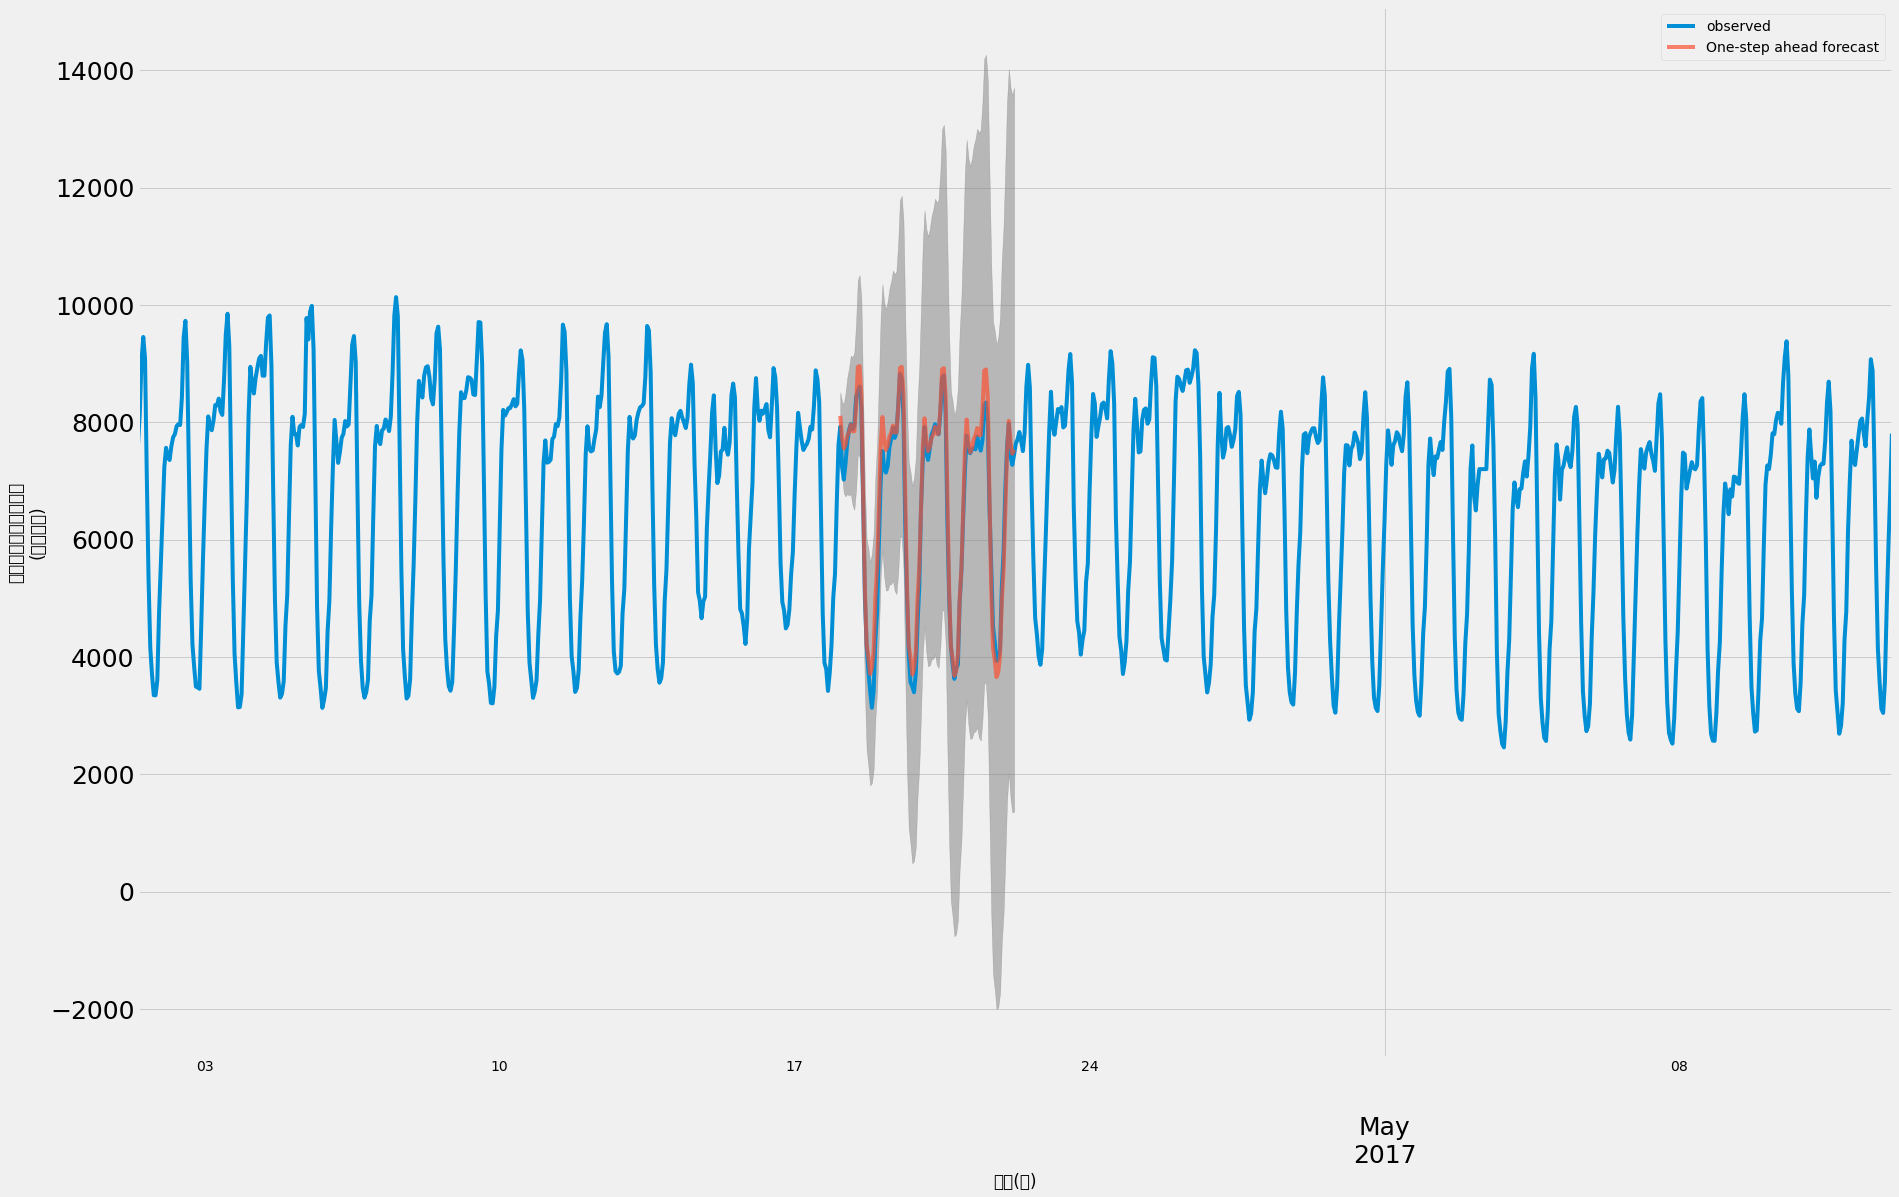

In [136]:
ax = mte[:1000].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1], color='gray', alpha=.5)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax.set_xlabel(u'时间(年)')
ax.set_ylabel('天然气二氧化碳排放量\n(百万公吨)')
plt.legend()
plt.show()

In [165]:
forecast = results.get_forecast(steps= 120, dynamic=True, full_results=True)
# 得到预测的置信区间
forecast_ci = forecast.conf_int()
mte_forecast = forecast.predicted_mean
mte_pred_concat = pd.concat([mte_forecast,forecast_ci],axis=1)
mte_pred_concat.columns = [u'预测值',u'下限',u'上限']
mte_pred_concat.head()

,预测值,下限,上限
2017-05-13 02:00:00,8285.029173,7918.039377,8652.018970
2017-05-13 03:00:00,7915.648104,7424.867095,8406.429113
2017-05-13 04:00:00,7627.469347,7057.717194,8197.221501
2017-05-13 05:00:00,7840.972569,7215.907956,8466.037183
2017-05-13 06:00:00,7846.049327,7180.554891,8511.543763


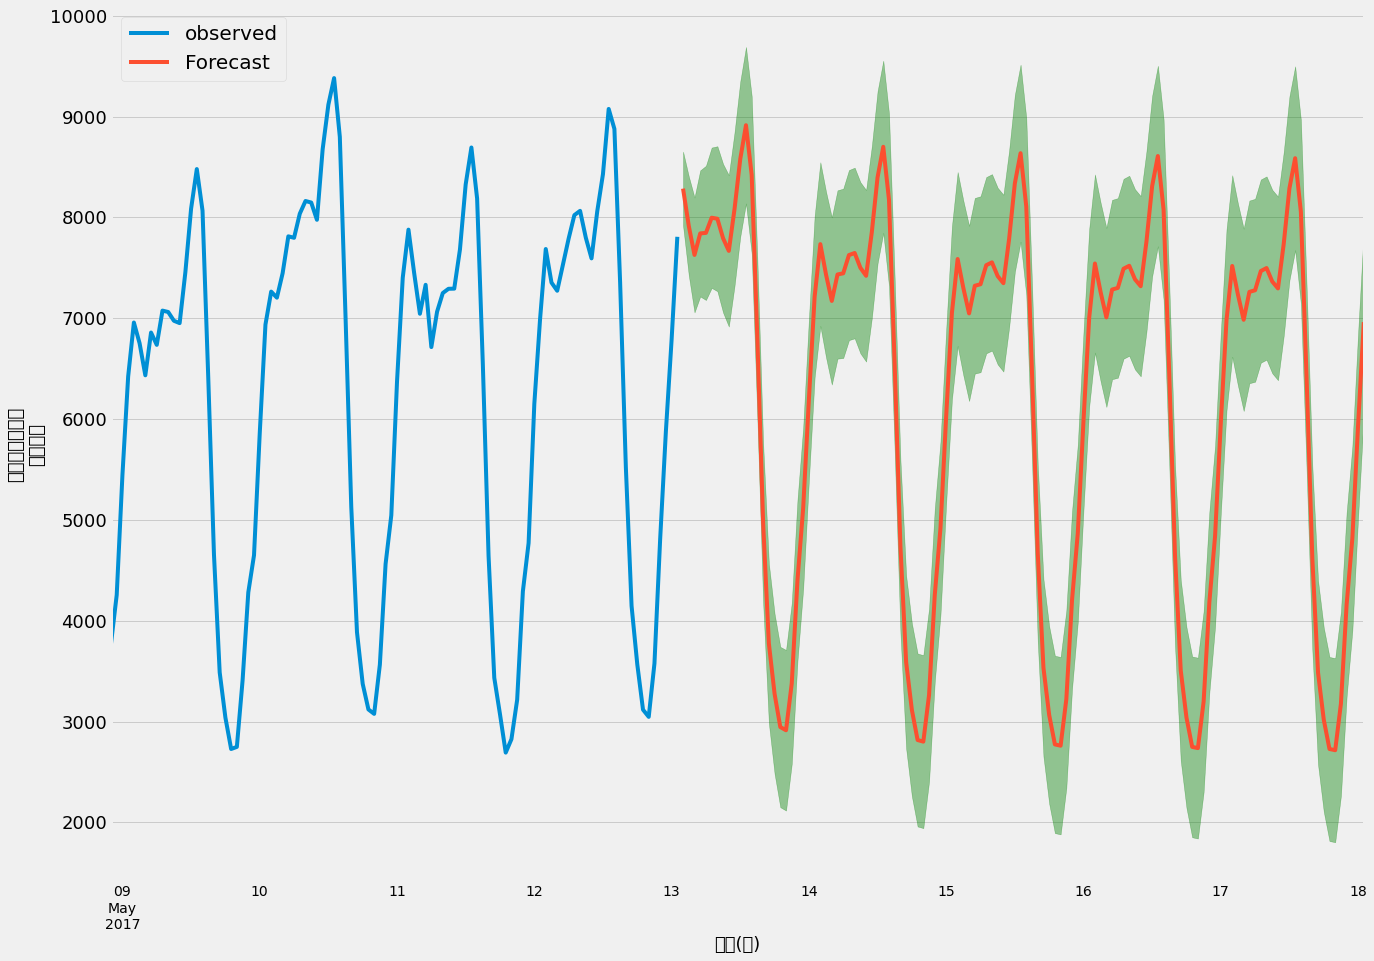

In [163]:
#绘制时间序列图
ax = mte[900:1120].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 18)
ax.set_xlabel('时间(年)',fontsize=18)
ax.set_ylabel('天然气二氧化碳\n排放水平',fontsize=18)
plt.legend(loc = 'upper left',fontsize=20)
plt.show()

In [158]:
forecast = results.get_forecast(steps=10)
print(forecast.predicted_mean)

2017-05-13 02:00:00    8285.029173
2017-05-13 03:00:00    7915.648104
2017-05-13 04:00:00    7627.469347
2017-05-13 05:00:00    7840.972569
2017-05-13 06:00:00    7846.049327
2017-05-13 07:00:00    7996.448364
2017-05-13 08:00:00    7986.506788
2017-05-13 09:00:00    7792.348987
2017-05-13 10:00:00    7667.610881
2017-05-13 11:00:00    8083.333758
Freq: H, Name: predicted_mean, dtype: float64


In [172]:
p = results.get_forecast()

In [196]:
p.predicted_mean

ts
2017-04-01 10:00:00       0.000000
2017-04-01 11:00:00    9870.781603
2017-04-01 12:00:00    9214.761569
2017-04-01 13:00:00    9903.378702
2017-04-01 14:00:00    9987.842927
                          ...     
2017-05-12 21:00:00    3450.732542
2017-05-12 22:00:00    4496.862170
2017-05-12 23:00:00    5292.321905
2017-05-13 00:00:00    6955.018320
2017-05-13 01:00:00    7679.032427
Freq: H, Name: predicted_mean, Length: 1000, dtype: float64

In [195]:
forecast_ci = p.conf_int()
print(forecast_ci)

                     lower value   upper value
ts                                            
2017-04-01 10:00:00 -3394.757202   3394.757202
2017-04-01 11:00:00  6735.525109  13006.038096
2017-04-01 12:00:00  6100.946923  12328.576214
2017-04-01 13:00:00  6792.393964  13014.363440
2017-04-01 14:00:00  6877.236254  13098.449600
...                          ...           ...
2017-05-12 21:00:00  3083.740827   3817.724257
2017-05-12 22:00:00  4129.870844   4863.853496
2017-05-12 23:00:00  4925.330965   5659.312844
2017-05-13 00:00:00  6588.027764   7322.008875
2017-05-13 01:00:00  7312.042252   8046.022602

[1000 rows x 2 columns]


In [197]:
p = results.get_prediction(start=0)
forecast_ci = p.conf_int()

In [199]:
forecast_ci

,lower value,upper value
ts,,
2017-04-01 10:00:00,-3394.757202,3394.757202
2017-04-01 11:00:00,6735.525109,13006.038096
2017-04-01 12:00:00,6100.946923,12328.576214
2017-04-01 13:00:00,6792.393964,13014.363440
2017-04-01 14:00:00,6877.236254,13098.449600
...,...,...
2017-05-12 21:00:00,3083.740827,3817.724257
2017-05-12 22:00:00,4129.870844,4863.853496
2017-05-12 23:00:00,4925.330965,5659.312844


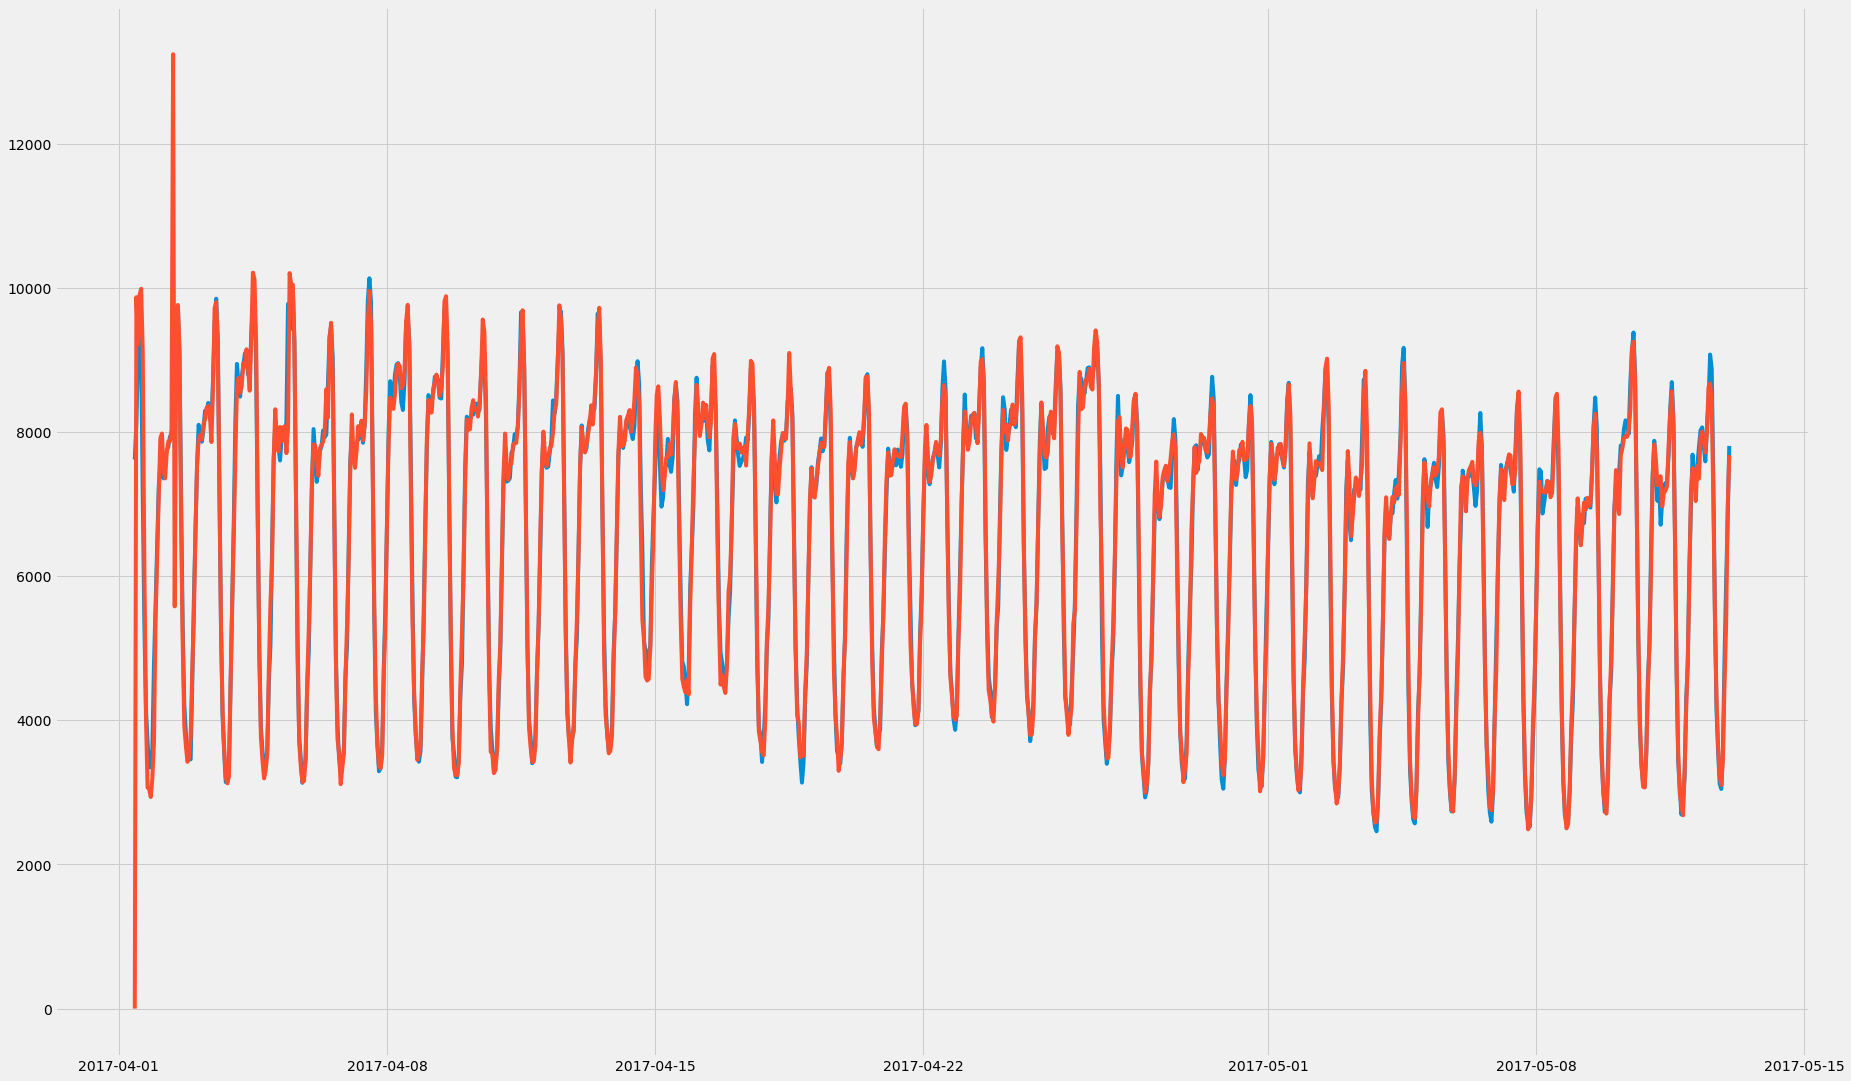

In [198]:
y_pred = p.predicted_mean
y_true = history_data[:1000]

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='w', alpha=.4)
plt.plot(y_true)
plt.plot(y_pred)